# SMM Raw surface simulator

In [1]:
%pylab inline  
import numpy as np  
import matplotlib.pyplot as pl 
from PIL import Image 
import os    
from  DeviceSimulator import RawDataBuilder
reload(RawDataBuilder)

Populating the interactive namespace from numpy and matplotlib


<module 'DeviceSimulator.RawDataBuilder' from 'DeviceSimulator\RawDataBuilder.pyc'>

In [6]:
#outputPath ="C:\\_Projects\\pythonGit\\SurfaceInvestigation\\SimulatedSurface50026\\ScanRawData.dat"
outputPath ="E:\\My_files\\Interf\\Python\\SimulatedSurface50026\\ScanRawData2.dat"
def showImages(rawFrame, z): 
        rawFrameT =  rawFrame 
        ImgI = Image.fromarray(rawFrameT) 
        from IPython import display 
        extra = Rectangle((0, 0), 1, 1, fc="w", fill=False, edgecolor='none', linewidth=0)
        s = 'z={}'.format(z)
        pl.legend([extra ], [s])
        pl.imshow(ImgI, cmap=plt.get_cmap('gray'), vmin=0, vmax=255)
        display.clear_output(wait=True)
        display.display(pl.gcf())
        pass 
def showAndSaveImages(rawFrame, z):   
        f = open(outputPath, 'ab')  
        buf = np.getbuffer(rawFrame.flatten().tobytes())
        f.write(buf) 
        f.close()
        showImages(rawFrame, z)

In [7]:
c = 299792458.0 * 10**9  # micron/s (* 10^12 for nanometers) - light speed

# Device Parameters (7-QS) - to be moved to  
SerialNumber=50026
#pixel size  
Micron_Per_Pixel=0.447000  
# # max brightness and background(gray values)
# I0 = 100
# Ibkg = 40

# light source
fi0 = 0.0
WaveLength=0.535000 
bw = 0.0125 # bandwidth, microns


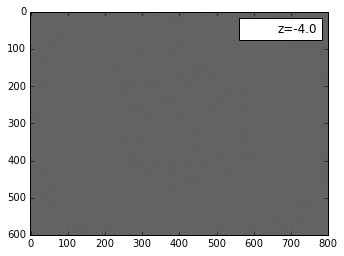

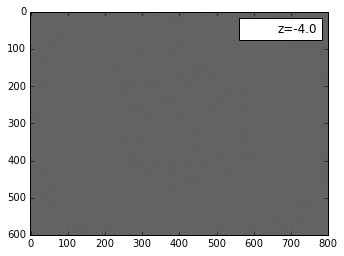

In [14]:
#Raw surface simulation

#clear source 
if os.path.exists(outputPath) and os.path.isfile(outputPath):
    os.remove(outputPath)
#Scan parameters 
# screen size in pixels:
W=800 
H=600
# center in microns 
x0 = (W/2 )  * Micron_Per_Pixel
y0 = (H/2 )  * Micron_Per_Pixel
z0 =-5
R=50000
piezoStart = -4;  piezoEnd =12  
rdb = RawDataBuilder.RawDataBuilder(W, H, Micron_Per_Pixel, WaveLength, bw,  piezoStep = 0.315 )
print rdb
rdb.rawSphere((x0, y0), R, piezoStart, piezoEnd, True, fi0,  z0,
              #piezoRange = piezo1,
              frameCallback = showAndSaveImages)


In [ ]:
#Flat fiber simulation

#clear source 
if os.path.exists(outputPath) and os.path.isfile(outputPath):
    os.remove(outputPath)
#Scan parameters 
# screen size in pixels:
W=800 
H=600
# center in microns 
x0 = (W/2 )  * Micron_Per_Pixel
y0 = (H/2 )  * Micron_Per_Pixel
z0 =0 
Rferrule = 15000  
piezoStart = -11;  piezoEnd = 10  
Dfiber = 125  #micron, standard singlefiber
Hfiber = 0.021  # 0.250 #micron 
rdb = RawDataBuilder.RawDataBuilder(W, H, Micron_Per_Pixel, WaveLength, bw, piezoStep = 0.1955)
print rdb
rdb.singleFiberFlat((x0, y0), Rferrule, Dfiber, Hfiber,  piezoStart, piezoEnd, True, fi0,  z0, None, showAndSaveImages)


[   0.          0.315023    0.630386    0.946088    1.26213     1.57851
    1.89523     2.21229     2.52969     2.84742     3.1655      3.48392
    3.80267     4.12177     4.4412      4.76098     5.08109     5.40154
    5.72233     6.04347     6.08504     6.12975     6.22682     6.30506
    6.65185     6.72725     6.7417      6.74659     6.75462     6.76646
    6.81311     6.84087     6.84808     6.87806     7.21861     7.22706
    7.27087     7.30963     7.47282     7.51901     7.56876     7.99478
    8.27658     8.28797     8.28964     8.30931     8.44173     8.44356
    8.89336     8.89977     9.35434     9.39875     9.59427     9.78983
   10.2765     10.7557     11.1587     11.4563     11.471      11.7948
   12.1299     12.4653     12.801      13.1371     13.4735     13.8102
   14.1473     14.4847     14.8224     15.1605     15.499      15.8378
   16.1769     16.5163     16.8561     17.1963     17.5367     17.8775
   18.2187     18.5602     18.902      19.2442     19.5867     19.92

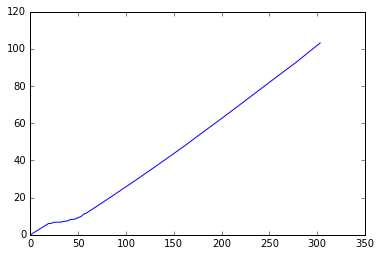

In [11]:
# piezo distance graphics - change log path to what you actually have
logPath1 = "C:\\ProgramData\\Sumix\\MaxInspect\\SF3_1821\\Logs"
piezoDistance = "piezoDistance.txt"
piezopath1 = logPath1 +"\\" + piezoDistance
piezo1 = np.loadtxt(piezopath1 )  
print piezo1
x1 =  range(piezo1.size )
plt.plot (x1, piezo1)  
plt.show()

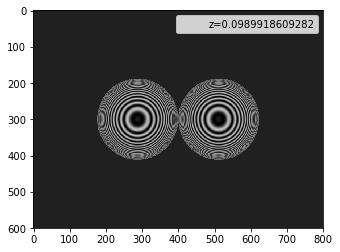

In [ ]:
#Two bead simulation

#clear source 
if os.path.exists(outputPath) and os.path.isfile(outputPath):
    os.remove(outputPath)
#Scan parameters 
# screen size in pixels:
W=800 
H=600
# center in microns 
z0 =0

piezoStart = -5;  piezoEnd = 5
WaveLength = 0.535
Micron_Per_Pixel = 0.0447 #Real constant is 0.447
R = 5  #radius one sphere in micron
rdb = RawDataBuilder.RawDataBuilder(W, H, Micron_Per_Pixel, WaveLength, bw, piezoStep = 0.1)
print rdb
rdb.rawTwoSphere(R,piezoStart, piezoEnd, True, fi0,  z0, None, showAndSaveImages)